In [1]:
from projectlib2 import *

## Parameters

In [60]:
# Systemparamters
epsilon = 0.01 #time scale seperation ~ refractory period
a = 3          #excitation duration
b = 0.2        #from excitation threshhold b/a
D = 1          #Diffusitivity

# Grid
N = 200
L = 300

# Time
t_end = 800

## Functions FitzHugh-Nagumo

In [61]:
def fitzhugh_nagumo_du(u, v): #excitation (membrane voltage)
    return (a*u*(u-b)*(1-u) - v + D*convolve(u, laplace(N, L), mode="reflect"))

def fitzhugh_nagumo_dv(u, v): #refractory
    return epsilon*(u-v)

## Start Conditions

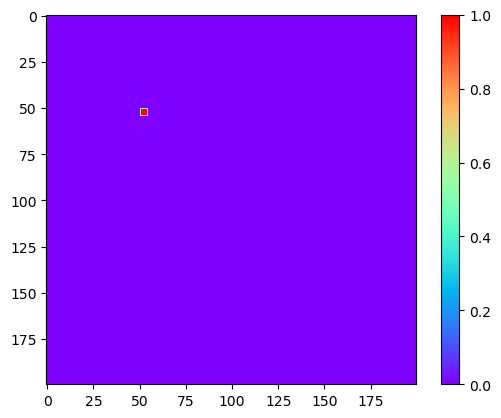

In [62]:
# for concentric wave
x = np.linspace(-L / 2, L / 2, N, endpoint=False)
X, Y = np.meshgrid(x, x)
u = np.zeros((N,N))
v = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if (i>50) and (i<55):
            if (j>50) and (j<55):
                u[i][j] = 1
 

plt.imshow(u, vmin=0, vmax=1, cmap="rainbow")
plt.colorbar()
plt.show()

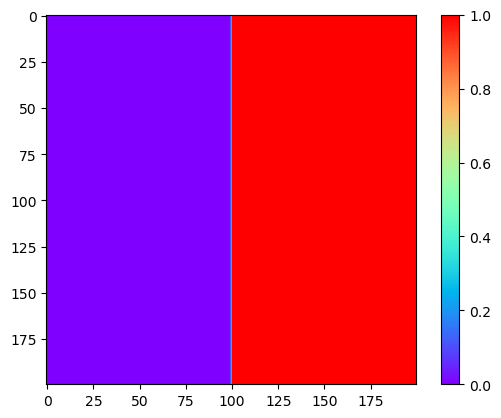

In [78]:
# for spiral wave
x = np.linspace(-L / 2, L / 2, N, endpoint=False)
X, Y = np.meshgrid(x, x)
u = np.zeros((N,N))
v = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if (i<N/5):
            if (j<N/2):
                u[i][j] = 1
        if (j>=N/2):
            v[i][j] = 1
 

plt.imshow(u, vmin=0, vmax=1, cmap="rainbow")

plt.colorbar()
plt.show()

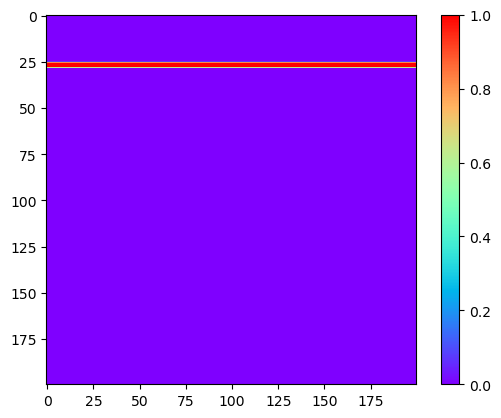

In [83]:
# for wave front
x = np.linspace(-L / 2, L / 2, N, endpoint=False)
X, Y = np.meshgrid(x, x)
u = np.zeros((N,N))
v = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if (i>N/8) and (i<N/7):
                u[i][j] = 1

plt.imshow(u, vmin=0, vmax=1, cmap="rainbow")
plt.colorbar()
plt.show()

In [84]:
# for wave front
thick = N/5
width = N/5

x = np.linspace(-L / 2, L / 2, N, endpoint=False)
X, Y = np.meshgrid(x, x)
u2 = np.zeros((N,N))
v2 = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if (i<N/2):
            if (j>N/2 - width) and (j<N/2 + width):
                u2[i][j] = 1

 

plt.imshow(u2, vmin=0, vmax=1, cmap="rainbow")
plt.colorbar()
plt.show()

In [85]:
u[0][1]

0.0

### Solve Barkley and cause spirals

In [86]:
def solve_system_add_spiral(func_du, func_dv, u_start, v_start,  t_end, t_excit,dt=1e-2, output_steps=50):
    U = []           # output
    V = []   
    
    u = u_start      # N*N Matrix with startvalues for excitation
    v = v_start
    
    t = 0
    t_output = np.linspace(0, t_end, output_steps)
    for t_next in t_output:
        while t < t_next:
            if (t > t_excit ) and (t<t_excit+5):
                u += u2
            u = u + dt * func_du(u, v)
            v = v + dt * func_dv(u, v)
            t += dt
        U.append(u)
        V.append(v)
    return U, V


In [87]:
t_excit = 200
U, V = solve_system_add_spiral(fitzhugh_nagumo_du, fitzhugh_nagumo_dv, u, v, t_end, t_excit)
np.save("barkley_u_1", U)
np.save("barkley_v_1", V)

In [88]:

def plot_state(i):
    return plt.imshow(U[i].reshape(N, N), vmin=0, vmax=1, cmap="rainbow")

### Plot Barkley Solution

In [89]:
frame_setting=50
interval_setting=10000/frame_setting
ani1 = animation.FuncAnimation(plt.gcf(), plot_state,frames=frame_setting, interval=interval_setting, blit=False,repeat_delay=100)
HTML(ani1.to_html5_video())